In [90]:
import os
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from env.VRPInstance import VRPInstance
from argparse import Namespace
import plotly.graph_objects as go

In [91]:
VRP_KEYS = ['E-n22-k4', 'E-n23-k3', 'E-n30-k3', 'E-n33-k4', 'E-n51-k5', 'E-n76-k7', 'E-n101-k8', 'X-n143-k7', 'X-n214-k11', 'X-n351-k40', 'X-n459-k26', 'X-n573-k30', 'X-n685-k75', 'X-n749-k98', 'X-n819-k171', 'X-n916-k207', 'X-n1001-k43']
VRP_KEYS = [f"{name}.evrp" for name in VRP_KEYS]

In [92]:
pd.options.display.float_format = '{:.2f}'.format

In [93]:
print("Initial scores:")
args = Namespace(round_int=False, algo=None, data_folder='dataset/train/data_evrp_wcci')
init_scores = {}
for key in VRP_KEYS:
    instance = VRPInstance.from_path(f"dataset/train/data_evrp_wcci/{key}", args, key)
    init_score = instance.evaluation(instance.init_solution)
    init_scores[key] = init_score
init_scores = pd.Series(init_scores).to_frame(name="Score")
init_scores

Initial scores:


,Score
E-n22-k4.evrp,908.33
E-n23-k3.evrp,1233.90
E-n30-k3.evrp,1651.36
E-n33-k4.evrp,2455.53
E-n51-k5.evrp,1625.67
E-n76-k7.evrp,2276.37
E-n101-k8.evrp,2722.35
X-n143-k7.evrp,94406.30
X-n214-k11.evrp,65817.27
X-n351-k40.evrp,108215.64


In [94]:
def load_score(folder, seeds):
    df = load_all_scores(folder, seeds, VRP_KEYS)
    best_score = df.applymap(lambda x: min(x))
    overall = best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
    overall.index = ["Min", "Max", "Mean", "Std."]
    return df, best_score, overall.T

In [95]:
print("IRL_HGS1 scores:")
irl_hgs_1_df, irl_hgs_1_best_score, irl_hgs_1_overall = load_score("logs/dataset_train_data_evrp_wcci_HGS_0.0", range(1, 7))
irl_hgs_1_overall

IRL_HGS1 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,386.96,386.96,386.96,0.00
E-n23-k3.evrp,581.07,581.07,581.07,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,529.90,529.90,0.00
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,836.07,839.00,838.51,1.09
X-n143-k7.evrp,15865.19,15880.76,15877.79,5.69
X-n214-k11.evrp,11018.85,11041.02,11026.72,8.19
X-n351-k40.evrp,26280.46,26366.54,26322.43,26.50


In [96]:
print("IRL_HGS2 scores:")
irl_hgs_2_df, irl_hgs_2_best_score, irl_hgs_2_overall = load_score("logs/dataset_train_data_evrp_wcci_HGS_0.1", range(1, 7))
irl_hgs_2_overall

IRL_HGS2 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,386.96,386.96,386.96,0.00
E-n23-k3.evrp,581.07,581.07,581.07,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,529.90,529.90,0.00
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,839.00,839.00,839.00,0.00
X-n143-k7.evrp,15865.50,15878.51,15876.18,4.79
X-n214-k11.evrp,10991.83,11047.12,11022.50,17.79
X-n351-k40.evrp,26222.71,26293.91,26270.06,24.12


In [97]:
print("IRL_VNS1 scores:")
irl_vns_1_df, irl_vns_1_best_score, irl_vns_1_overall = load_score("logs/dataset_train_data_evrp_wcci_VNS_0.0", range(1, 7))
irl_vns_1_overall

IRL_VNS1 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,384.68,384.68,384.68,0.00
E-n23-k3.evrp,571.95,571.95,571.95,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,533.78,531.23,1.81
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,834.22,839.00,836.98,1.53
X-n143-k7.evrp,15894.59,16035.07,15935.47,47.99
X-n214-k11.evrp,11199.29,11361.51,11277.73,63.28
X-n351-k40.evrp,26806.12,26862.66,26831.27,21.59


In [98]:
print("IRL_VNS2 scores:")
irl_vns_2_df, irl_vns_2_best_score, irl_vns_2_overall = load_score("logs/dataset_train_data_evrp_wcci_VNS_0.1", range(1, 7))
irl_vns_2_overall

IRL_VNS2 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,384.68,384.68,384.68,0.00
E-n23-k3.evrp,571.95,571.95,571.95,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,541.94,543.39,542.91,0.68
E-n76-k7.evrp,692.64,696.27,693.85,1.71
E-n101-k8.evrp,835.39,840.89,838.71,1.64
X-n143-k7.evrp,15919.31,16208.45,16074.68,101.24
X-n214-k11.evrp,11152.30,11386.05,11273.72,77.18
X-n351-k40.evrp,26696.94,26867.72,26795.06,69.41


In [99]:
irl_hgs_1_running_time = irl_hgs_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_hgs_2_running_time = irl_hgs_2_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_1_running_time = irl_vns_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_2_running_time = irl_vns_2_df.index.get_level_values("Running Time")[-1]/3600*3

print(f"IRL_HGS1 running time = {irl_hgs_1_running_time:.2f}h")
print(f"IRL_HGS2 running time = {irl_hgs_2_running_time:.2f}h")
print(f"IRL_VNS1 running time = {irl_vns_1_running_time:.2f}h")
print(f"IRL_VNS2 running time = {irl_vns_2_running_time:.2f}h")

IRL_HGS1 running time = 2.19h
IRL_HGS2 running time = 3.86h
IRL_VNS1 running time = 6.05h
IRL_VNS2 running time = 7.65h


In [219]:
def show_init_graphs(key_str="E-"):
    n = 7 if key_str=="E-" else 10
    width = 1200 if key_str=="E-" else 1800
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_evrp_wcci_init", exist_ok=True)
    args = Namespace(round_int=False, algo=None, data_folder='dataset/train/data_evrp_wcci')
    for i, key in enumerate([x for x in VRP_KEYS if key_str in x]):
        instance = VRPInstance.from_path(f"dataset/train/data_evrp_wcci/{key}", args, key)
        instance.solution = instance.init_solution
        plotly_fig, score = instance.plot(), instance.evaluation(instance.solution)
        plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_init/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

In [220]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    n = 7 if key_str=="E-" else 10
    width = 1200 if key_str=="E-" else 1800
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_evrp_wcci_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate([x for x in VRP_KEYS if key_str in x]):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_evrp_wcci")
        plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

Small-scale instances:
ClockHand:


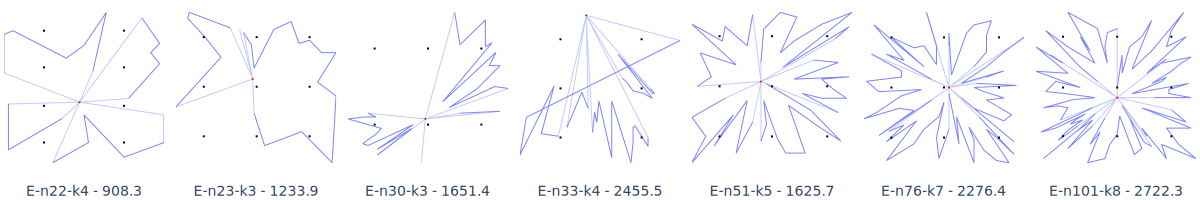

IRL_HGS1


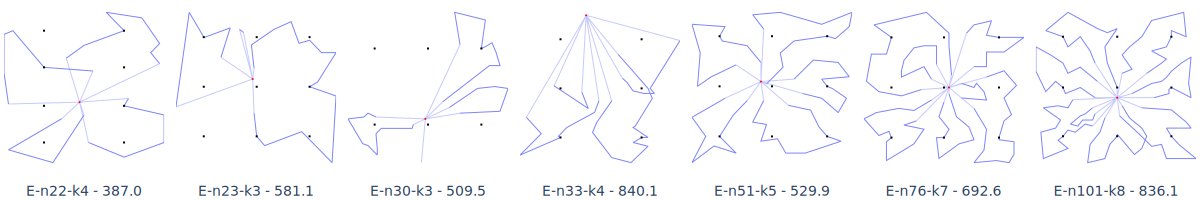

IRL_HGS2


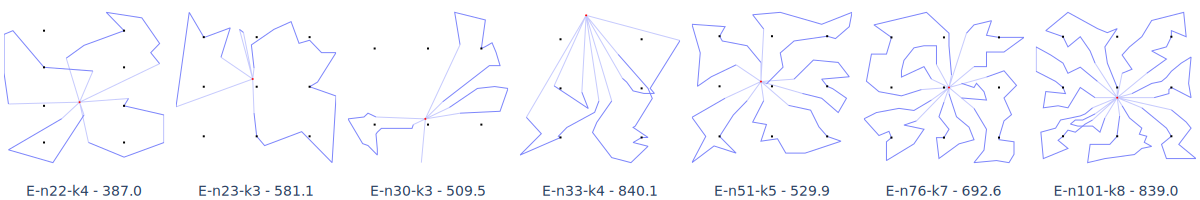

IRL_VNS1


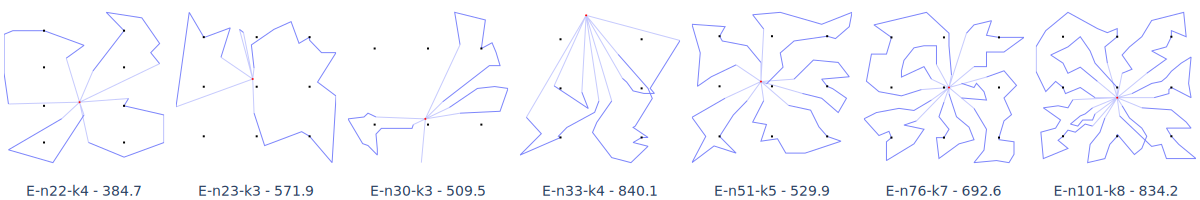

IRL_VNS2


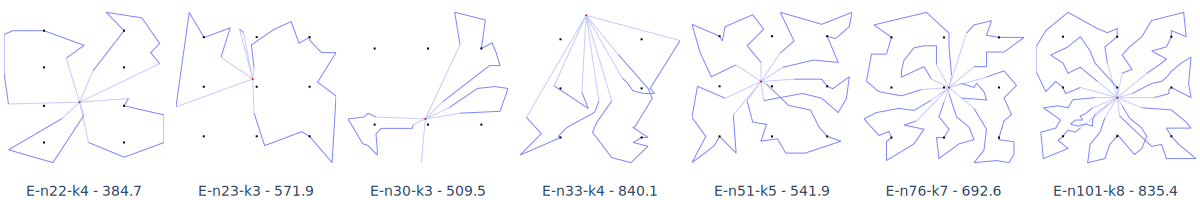

In [221]:
print("Small-scale instances:")
print("ClockHand")
show_init_graphs("E-")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, "E-")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "E-")
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, "E-")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "E-")

Large-scale instances:
ClockHand


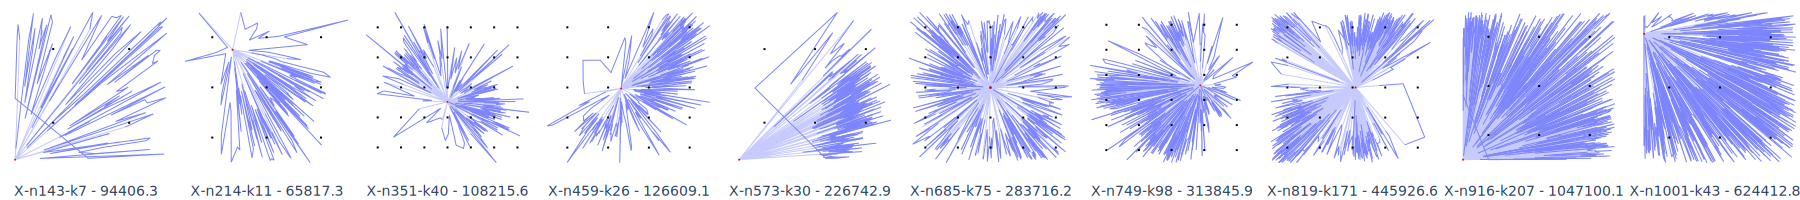

IRL_HGS1


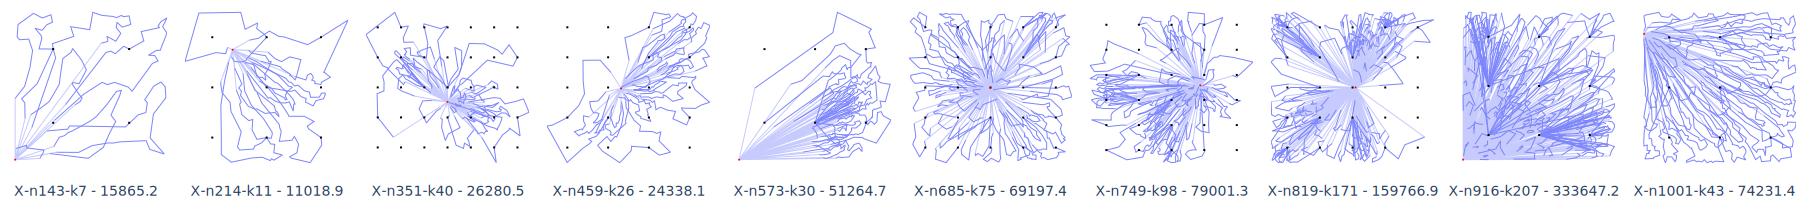

IRL_HGS2


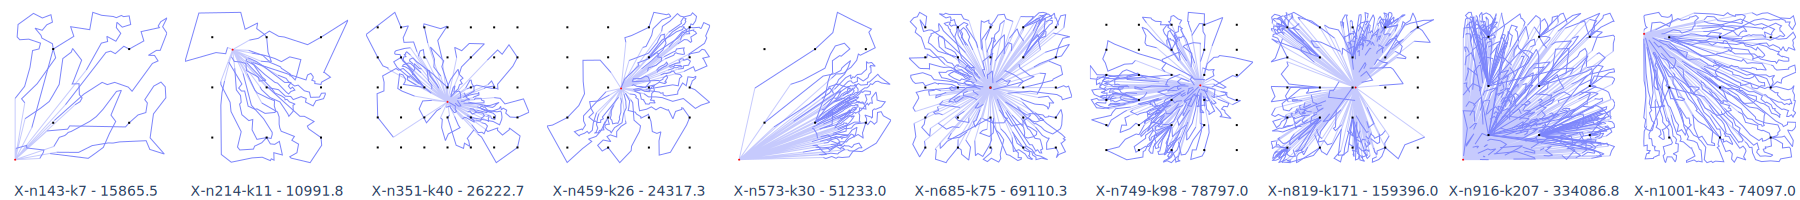

IRL_VNS1


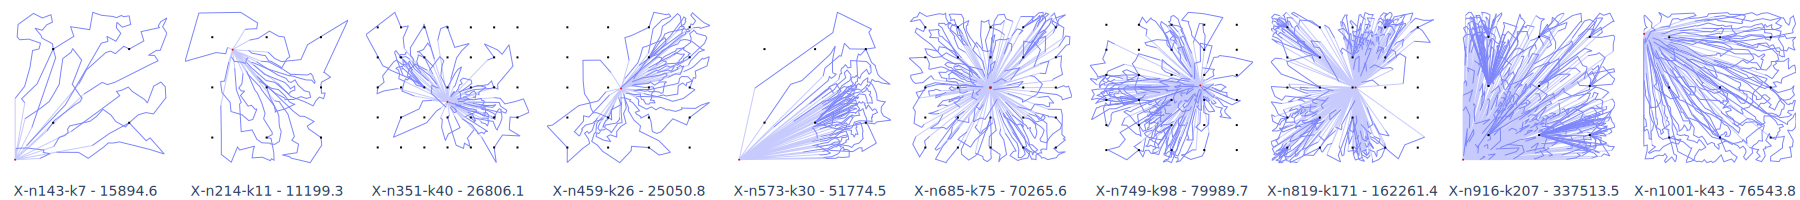

IRL_VNS2


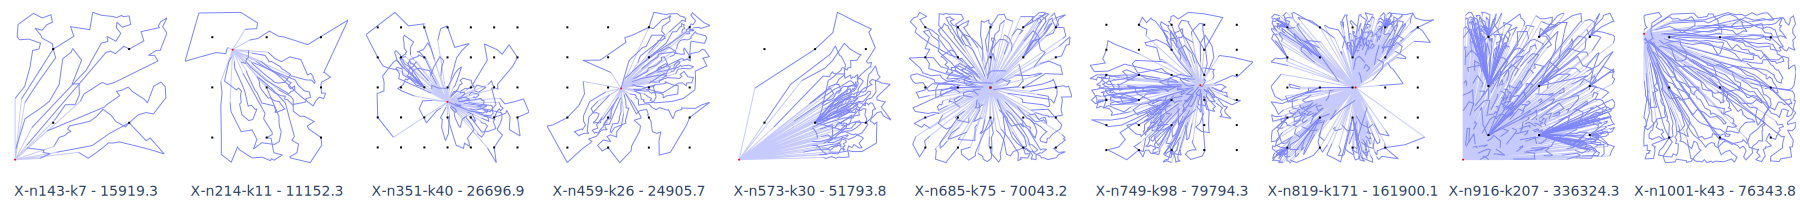

In [229]:
print("Large-scale instances:")
print("ClockHand")
show_init_graphs("X-")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, "X-")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "X-")
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, "X-")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "X-")

In [225]:
def create_scatter(data, name, line_color, showlegend):
    data = data.to_numpy().min(-1)
    best_data = []
    for x in data:
        best_data.append(x)
        best_data[-1] = min(best_data)
    data = best_data
    scatter = go.Scatter(x=np.arange(len(data))/len(data), y=data, mode='lines', legendgroup=name, name=name, line_width=2, line_color=line_color, showlegend=showlegend)
    return scatter

In [230]:
print("Large-scale instances:")
keys = [key for key in VRP_KEYS if key.startswith("X-")]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    vns = create_scatter(irl_vns_2_df[key], 'VNS', "#EF553B", i==0)
    fig.append_trace(vns, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".evrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show()

Large-scale instances:


In [231]:
print("Large-scale instances:")
keys = [key for key in VRP_KEYS if key.startswith("X-")]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    hgs = create_scatter(irl_hgs_2_df[key], 'HGS', "#636EFA", i==0)
    fig.append_trace(hgs, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".evrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show()

Large-scale instances:
